In [1]:
import numpy as np
from scipy import fftpack as fft
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

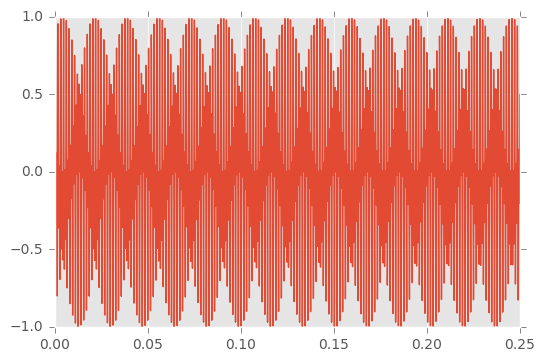

In [2]:
Fs = 32768
duration = 0.25
t = np.linspace(0, duration, duration * Fs)
f1, f2 = 697, 1336
y1 = np.sin(2 * np.pi * f1 * t);
y2 = np.sin(2 * np.pi * f2 * t);
y = (y1 + y2) / 2
plt.plot(t, y)

In [3]:
# Add something to make this play sound

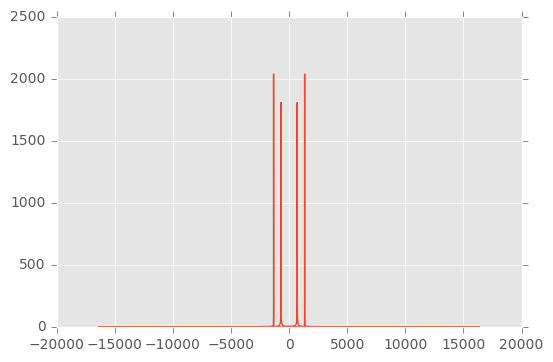

In [4]:
n = y.shape[0]
p = np.abs(fft.fft(y));
f = fft.fftfreq(n, d=1/Fs)
plt.plot(f,p);

In [5]:
# Why did this happen? Property of the Fourier transform of real-valued signals
# Exercise - make the plot above look pretty

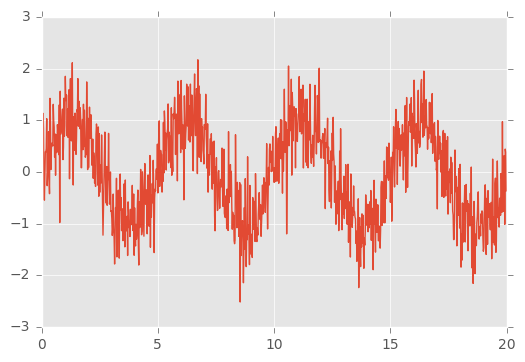

In [6]:
# Example of noisy signal
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
plt.plot(time_vec, sig)

(0, 5)

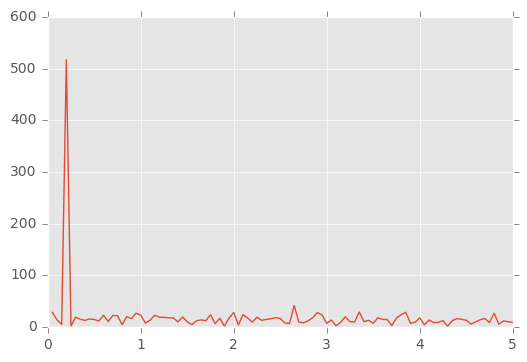

In [7]:
sample_freq = fft.fftfreq(sig.size, d=time_step)
sig_fft = fft.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]
plt.plot(freqs, power)
plt.xlim(0, 5)

/Users/jaidevd/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


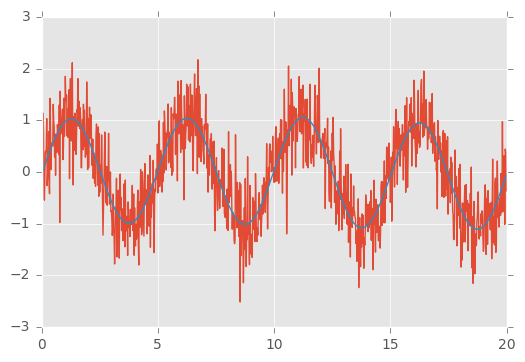

In [8]:
# denoising
freq = freqs[power.argmax()]
sig_fft[np.abs(sample_freq) > freq] = 0
# Reconstruction
recons = fft.ifft(sig_fft)
plt.plot(time_vec, sig, time_vec, recons)

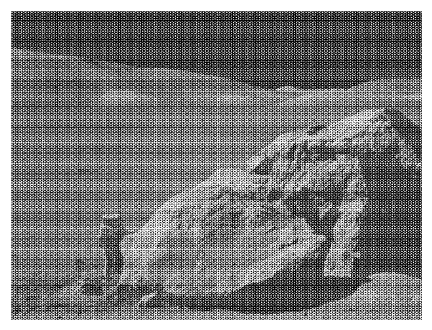

In [9]:
# exercise: Moon landing denoising
x = plt.imread("http://www.scipy-lectures.org/_images/moonlanding.png")
plt.imshow(x, cmap=plt.cm.gray)
plt.yticks([])
plt.xticks([])
plt.grid()

In [10]:
# enter code here

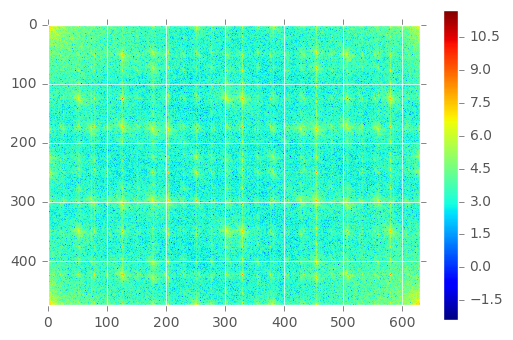

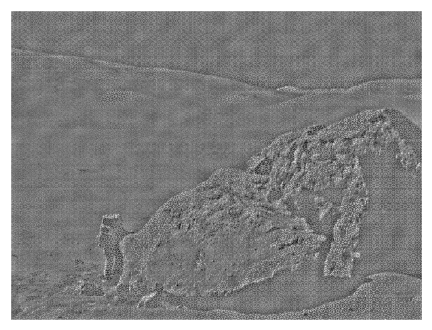

In [11]:
X = fft.fft2(x)
plt.figure()
plt.imshow(np.log(np.abs(X)))
plt.colorbar()
X[np.log(np.abs(X)) >= 6] = 0
plt.figure()
plt.imshow(np.real(fft.ifft2(X)), cmap=plt.cm.gray)
plt.yticks([])
plt.xticks([])
plt.grid()